## Priors


In [1]:
import bilby

priors = dict()
priors["m"] = bilby.core.prior.Uniform(0, 5, "m")
priors["c"] = bilby.core.prior.Uniform(-2, 2, "c")
priors["sigma"] = bilby.core.prior.Uniform(0, 10, "sigma")

In [14]:
priors["m"]

Uniform(minimum=0, maximum=5, name='m', latex_label='m', unit=None, boundary=None)

In [15]:
bilby.core.prior.Uniform?

Init signature:
bilby.core.prior.Uniform(
    minimum,
    maximum,
    name=None,
    latex_label=None,
    unit=None,
    boundary=None,
)
Docstring:      <no docstring>
Init docstring:
Uniform prior with bounds

Parameters
minimum: float
    See superclass
maximum: float
    See superclass
name: str
    See superclass
latex_label: str
    See superclass
unit: str
    See superclass
boundary: str
    See superclass
File:           ~/anaconda3/envs/thesis/lib/python3.11/site-packages/bilby/core/prior/analytical.py
Type:           type
Subclasses:     ConditionalPrior

## Sine wave of 2Hz sampled at 200Hz for 10 seconds. 

Sampling frequency is given by: $f_s=\frac{N}{T}$

Text(0, 0.5, 'Amplitude')

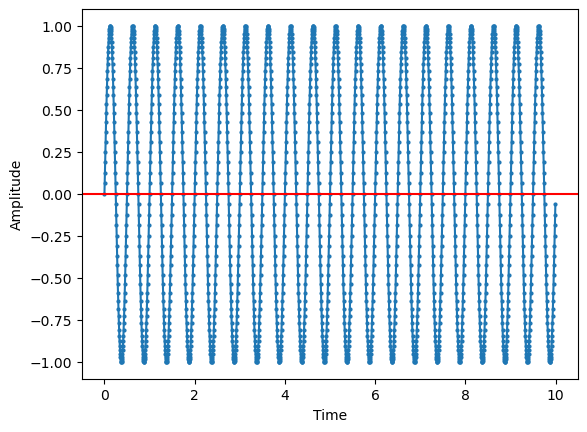

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f=2 # frequency of the signal
f_s=100*f # sampling frequency
T=10 # Time period of the signal

N=f_s*T # Number of samples
t=np.arange(N)/f_s # time steps
xt=np.sin(2*np.pi*f*t)

plt.plot(t,xt,'o-', markersize=2)
plt.axhline(0, color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')


In [4]:
t

array([0.000e+00, 5.000e-03, 1.000e-02, ..., 9.985e+00, 9.990e+00,
       9.995e+00])

## Setting up a signal

### Bilby style

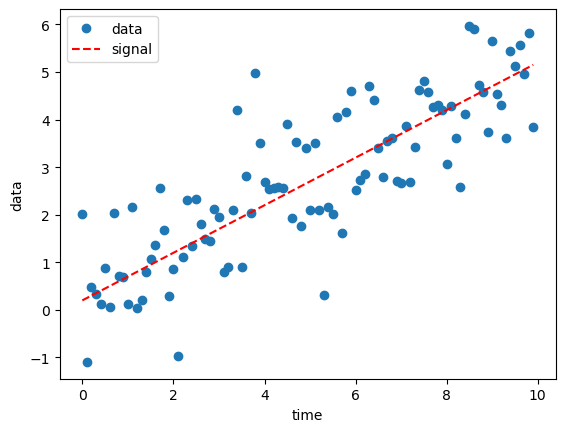

In [5]:
import numpy as np

def model(time, m, c):
    return time * m + c

injection_parameters = dict(m=0.5, c=0.2)
sampling_frequency = 10 
time_duration = 10

time = np.arange(0, time_duration, 1 / sampling_frequency) 
N = len(time) 
sigma = np.random.normal(1, 0.01, N) 

data = model(time, **injection_parameters) + np.random.normal(0, sigma, N)

fig, ax = plt.subplots()
ax.plot(time, data, "o", label="data")
ax.plot(time, model(time, **injection_parameters), "--r", label="signal")
ax.set_xlabel("time")
ax.set_ylabel("data")
ax.legend()

### My style

Text(0, 0.5, 'data')

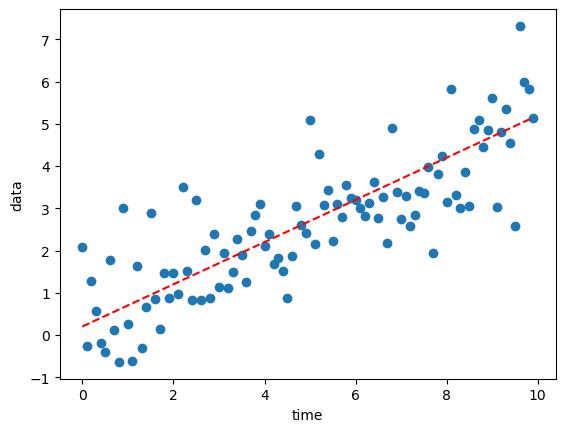

In [ ]:
def model(time, m, c):
    return time * m + c

injection_parameters = dict(m=0.5, c=0.2)
sampling_frequency = 10 
time_duration = 10

N=sampling_frequency*time_duration
time = np.arange(0,N)/sampling_frequency
sigma = np.random.normal(1, 0.01, N) 

data = model(time, **injection_parameters) + np.random.normal(0, sigma, N)

fig, ax = plt.subplots()
ax.plot(time, data, "o", label="data")
ax.plot(time, model(time, **injection_parameters), "--r", label="signal")
ax.set_xlabel("time")
ax.set_ylabel("data")

In [2]:
import bilby 
import pprint

In [3]:
pprint.pp(bilby.gw.prior.BNSPriorDict(), depth =1, width = 80)

12:25 bilby INFO    : No prior given, using default BNS priors in /home/kay/anaconda3/envs/thesis/lib/python3.11/site-packages/bilby/gw/prior_files/aligned_spins_bns_tides_on.prior.


{'mass_1': Constraint(minimum=0.5, maximum=5, name='mass_1', latex_label='$m_1$', unit=None),
 'mass_2': Constraint(minimum=0.5, maximum=5, name='mass_2', latex_label='$m_2$', unit=None),
 'mass_ratio': bilby.gw.prior.UniformInComponentsMassRatio(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None, equal_mass=False),
 'chirp_mass': bilby.gw.prior.UniformInComponentsChirpMass(minimum=0.4, maximum=4.4, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None),
 'luminosity_distance': bilby.gw.prior.UniformSourceFrame(minimum=100.0, maximum=5000.0, cosmology='Planck15', name='luminosity_distance', latex_label='$d_L$', unit='Mpc', boundary=None),
 'dec': Cosine(minimum=-1.5707963267948966, maximum=1.5707963267948966, name='dec', latex_label='$\\mathrm{DEC}$', unit=None, boundary=None),
 'ra': Uniform(minimum=0, maximum=6.283185307179586, name='ra', latex_label='$\\mathrm{RA}$', unit=None, boundary='periodic'),
 'theta_jn': Sine(minimum=

In [4]:
pprint.pp(bilby.gw.prior.BBHPriorDict(), depth =1, width = 80)

12:32 bilby INFO    : No prior given, using default BBH priors in /home/kay/anaconda3/envs/thesis/lib/python3.11/site-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.


{'mass_1': Constraint(minimum=5, maximum=100, name='mass_1', latex_label='$m_1$', unit=None),
 'mass_2': Constraint(minimum=5, maximum=100, name='mass_2', latex_label='$m_2$', unit=None),
 'mass_ratio': bilby.gw.prior.UniformInComponentsMassRatio(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None, equal_mass=False),
 'chirp_mass': bilby.gw.prior.UniformInComponentsChirpMass(minimum=25, maximum=100, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None),
 'luminosity_distance': bilby.gw.prior.UniformSourceFrame(minimum=100.0, maximum=5000.0, cosmology='Planck15', name='luminosity_distance', latex_label='$d_L$', unit='Mpc', boundary=None),
 'dec': Cosine(minimum=-1.5707963267948966, maximum=1.5707963267948966, name='dec', latex_label='$\\mathrm{DEC}$', unit=None, boundary=None),
 'ra': Uniform(minimum=0, maximum=6.283185307179586, name='ra', latex_label='$\\mathrm{RA}$', unit=None, boundary='periodic'),
 'theta_jn': Sine(minimum=0